<a href="https://colab.research.google.com/github/shivam-kotwalia/data-science-project/blob/master/TensorFlow_Servering_with_Dog_Vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x #this line should only be used on google colab

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #this line should only be used on google colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
! pip uninstall -q -y kaggle
! pip install -q --upgrade kaggle

In [9]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [10]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
import kaggle

In [20]:
!kaggle competitions download -c dogs-vs-cats

 98% 797M/812M [00:05<00:00, 168MB/s]
100% 812M/812M [00:05<00:00, 163MB/s]


In [0]:
!unzip -q dogs-vs-cats.zip

In [0]:
! rm -rf test1.zip

In [0]:
! unzip -q train.zip

In [0]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [0]:
# X = []
# Y = []

# for image_name in tqdm.tqdm_notebook(os.listdir("train")[:5000]):
#   image = cv2.imread("train/"+image_name)
#   image = cv2.resize(image,(150,150))
#   image = image/255 #min max scaling
#   X.append(image)
#   if "dog" in image_name:
#     Y.append(1)
#   else:
#     Y.append(0)

In [26]:
# *********************************
# | - train_data
#   | - cat
#   | - dog
# *********************************
master_folder = "train_data"
os.mkdir(master_folder)
unique_class = ["cat", "dog"]
[os.mkdir(os.path.join(".", master_folder, i)) for i in unique_class]

[None, None]

In [27]:
import shutil, tqdm
for image in tqdm.tqdm_notebook(os.listdir("train")):
  if "cat" in image:
    shutil.copy(os.path.join("train", image), os.path.join(master_folder, "cat"))
  else:
    shutil.copy(os.path.join("train", image), os.path.join(master_folder, "dog"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [0]:
# os.listdir("train_data/cat")

In [0]:
# | - data_folder
#   | - category_1
#   | - category_2
#   | - category_3

In [0]:
! rm -rf train

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)
train_generater = idg.flow_from_directory("train_data", target_size=(150,150), batch_size=32, subset="training")
val_generater = idg.flow_from_directory("train_data", target_size=(150,150), batch_size=32, subset="validation")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [0]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

In [33]:
tf_model = VGG16(include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [34]:
tf_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [35]:
# Freeze the conv layers - That Backpropogation will not happen in these layers
for layer in tf_model.layers:
  layer.trainable = False
  print(layer, layer.trainable)  

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4f075bf160> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f062da550> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f062dae10> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4f06340278> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f7697bb38> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f06334fd0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4f062f8358> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f062f8208> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f062f3550> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f06325710> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4f0630c630> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [0]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

In [0]:
tf_ouput = tf_model.output
x = Flatten()(tf_ouput)
x = Dense(512, activation=relu)(x)
x = Dense(2, activation=softmax)(x)

In [0]:
final_model = Model(inputs=tf_model.input, outputs=x)

In [39]:
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [40]:
for layer in final_model.layers:
  print(layer.trainable , layer)

False <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4f075bf160>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f062da550>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f062dae10>
False <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4f06340278>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f7697bb38>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f06334fd0>
False <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4f062f8358>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f062f8208>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f062f3550>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f06325710>
False <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4f0630c630>
False <tensorflow.python.keras.layers.convolutional.Conv2D obje

In [42]:
final_model.compile(SGD(), categorical_crossentropy, ["acc"])
model_history = final_model.fit(train_generater, validation_data=val_generater, epochs=5)

Epoch 1/5
625/625 [==============================] - 127s 203ms/step - loss: 0.3454 - acc: 0.8479 - val_loss: 0.2718 - val_acc: 0.8794
Epoch 2/5
625/625 [==============================] - 125s 201ms/step - loss: 0.2702 - acc: 0.8799 - val_loss: 0.3071 - val_acc: 0.8556
Epoch 3/5
625/625 [==============================] - 125s 201ms/step - loss: 0.2472 - acc: 0.8945 - val_loss: 0.2315 - val_acc: 0.9028
Epoch 4/5
625/625 [==============================] - 125s 201ms/step - loss: 0.2284 - acc: 0.9044 - val_loss: 0.2463 - val_acc: 0.8964
Epoch 5/5
625/625 [==============================] - 125s 201ms/step - loss: 0.2133 - acc: 0.9122 - val_loss: 0.2142 - val_acc: 0.9108


In [0]:
import matplotlib.pyplot as plt

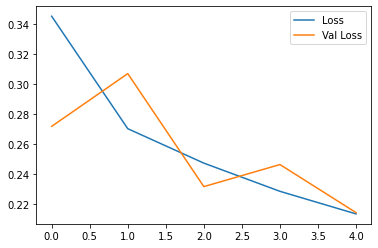

In [44]:
plt.plot(model_history.history["loss"], label="Loss")
plt.plot(model_history.history["val_loss"], label="Val Loss")
plt.legend()

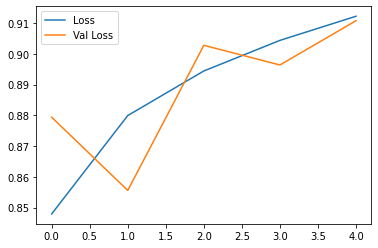

In [45]:
plt.plot(model_history.history["acc"], label="Loss")
plt.plot(model_history.history["val_acc"], label="Val Loss")
plt.legend()

In [0]:
### Save Model

In [0]:
VERSION = 1
! mkdir -p dog-vs-cat_model/{VERSION}

In [51]:
from tensorflow.keras.models import save_model
save_model(final_model, os.path.join("dog-vs-cat_model", str(VERSION)))

INFO:tensorflow:Assets written to: dog-vs-cat_model/1/assets


In [0]:
#Currently you saved the model so you know the input and output but if you would 
#have got the model from someone this would have been difficult
#So we have a CLI from TensorFlow to cheek MetaGraphDefs & Sugnature Defs
!saved_model_cli show --dir "dog-vs-cat_model/1" --all

In [0]:
# Install TensorFlow Serving

In [56]:
# Download the TensorFlow Serving 
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl -s https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt -qq update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
OK
43 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [57]:
!apt-get -qq install  tensorflow-model-server

Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.2.0_all.deb ...
Unpacking tensorflow-model-server (2.2.0) ...
Setting up tensorflow-model-server (2.2.0) ...


In [58]:
! tensorflow_model_server  --help

usage: tensorflow_model_server
Flags:
	--port=8500                      	int32	Port to listen on for gRPC API
	--grpc_socket_path=""            	string	If non-empty, listen to a UNIX socket for gRPC API on the given path. Can be either relative or absolute path.
	--rest_api_port=0                	int32	Port to listen on for HTTP/REST API. If set to zero HTTP/REST API will not be exported. This port must be different than the one specified in --port.
	--rest_api_num_threads=8         	int32	Number of threads for HTTP/REST API processing. If not set, will be auto set based on number of CPUs.
	--rest_api_timeout_in_ms=30000   	int32	Timeout for HTTP/REST API calls.
	--enable_batching=false          	bool	enable batching
	--allow_version_labels_for_unavailable_models=false	bool	If true, allows assigning unused version labels to models that are not available yet.
	--batching_parameters_file=""    	string	If non-empty, read an ascii BatchingParameters protobuf from the supplied file name and

In [69]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8501 --model_name=fashion_mnist --model_base_path="/content/dog-vs-cat_model" > server.log 2>&1

Starting job # 2 in a separate thread.


In [71]:
! cat server.log

cat: server.log: No such file or directory


In [0]:
# Prediction_function
import requests
import matplotlib.pyplot as plt
import json

class_names = ['cat', 'dog']

def _prediction(data):
    headers = {"content-type": "application/json"}
    json_response = requests.post('http://localhost:8501/v1/models/fashion_mnist:predict', data=data, headers=headers)
    json_result = json.loads(json_response.text)
    return json_result["predictions"]

def _prepare_image(filepath):
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (150, 150))
    plt.imshow(image,cmap="gray")
    plt.plot()
    image = np.expand_dims(image, 0)
    return json.dumps({"signature_name": "serving_default", "instances": image.tolist()})

In [61]:
! wget https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg

--2020-06-14 13:37:51--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156145 (152K) [image/jpeg]
Saving to: ‘1200px-Cat03.jpg’

1200px-Cat03.jpg    100%[===================>] 152.49K   925KB/s    in 0.2s    

2020-06-14 13:37:52 (925 KB/s) - ‘1200px-Cat03.jpg’ saved [156145/156145]



'cat'

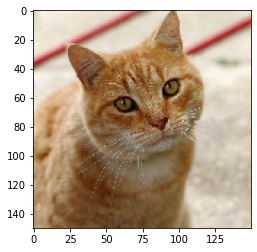

In [74]:
image_json = _prepare_image("1200px-Cat03.jpg")
image_pred = _prediction(image_json)
class_names[np.argmax(image_pred[0])]

In [75]:
! wget https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234558/Chinook-On-White-03.jpg

--2020-06-14 13:42:52--  https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234558/Chinook-On-White-03.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.143.94
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.143.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25761 (25K) [image/jpeg]
Saving to: ‘Chinook-On-White-03.jpg’

Chinook-On-White-03 100%[===================>]  25.16K   139KB/s    in 0.2s    

2020-06-14 13:42:53 (139 KB/s) - ‘Chinook-On-White-03.jpg’ saved [25761/25761]



'dog'

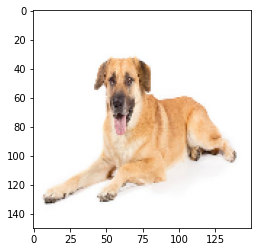

In [76]:
image_json = _prepare_image("Chinook-On-White-03.jpg")
image_pred = _prediction(image_json)
class_names[np.argmax(image_pred[0])]